# 1. Imports and Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

2025-05-27 14:35:39.643350: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-27 14:35:39.644649: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-27 14:35:39.647825: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-27 14:35:39.658844: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748356539.682120   43930 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748356539.68

# 2. Data Collection

In [2]:
# Load and preprocess Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train, y_train_cat, test_size=0.2, random_state=42)

# Image dimensions
image_height, image_width, channels = x_train_final.shape[1:4]
num_classes = y_train_cat.shape[1]

# 3. Data Validation


Training data shape: (48000, 28, 28, 1)
Validation data shape: (12000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


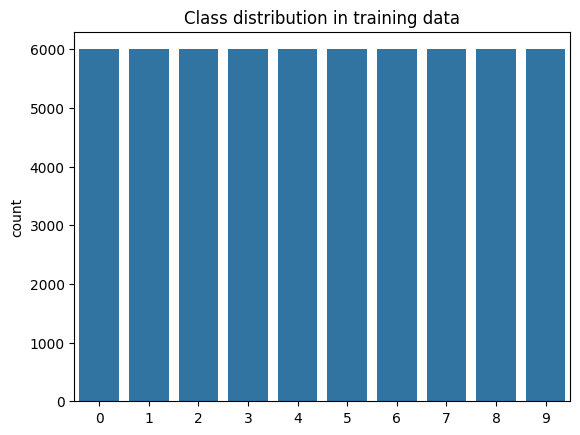

In [3]:
# Check shapes and sample distributions
print('Training data shape:', x_train_final.shape)
print('Validation data shape:', x_val.shape)
print('Test data shape:', x_test.shape)
sns.countplot(x=y_train.flatten())
plt.title('Class distribution in training data')
plt.show()

# 4. Exploratory Data Analysis

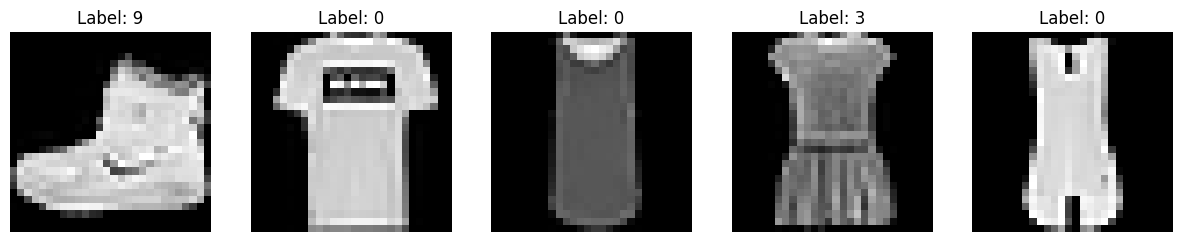

In [4]:
# Display example images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(x_train[i].reshape(28,28), cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.show()

# 5. Model 1: Baseline Model

In [5]:
model_1 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(x_train_final, y_train_final, epochs=10, validation_data=(x_val, y_val))

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-27 14:35:42.303454: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7918 - loss: 0.6019 - val_accuracy: 0.8816 - val_loss: 0.3322
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8916 - loss: 0.3050 - val_accuracy: 0.8937 - val_loss: 0.2896
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9071 - loss: 0.2588 - val_accuracy: 0.9027 - val_loss: 0.2715
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9160 - loss: 0.2287 - val_accuracy: 0.9045 - val_loss: 0.2684
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9283 - loss: 0.1993 - val_accuracy: 0.9052 - val_loss: 0.2620
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9349 - loss: 0.1744 - val_accuracy: 0.9088 - val_loss: 0.2568
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9413 - loss: 0.1590 - val_accuracy: 0.9122 - val_loss: 0.2428
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9484 - loss: 0

# 6. Model 2: Improved Model

In [6]:
model_2 = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(x_train_final, y_train_final, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7985 - loss: 0.5797 - val_accuracy: 0.8850 - val_loss: 0.3258
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8934 - loss: 0.3035 - val_accuracy: 0.8911 - val_loss: 0.2929
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9107 - loss: 0.2516 - val_accuracy: 0.9066 - val_loss: 0.2618
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9214 - loss: 0.2189 - val_accuracy: 0.9080 - val_loss: 0.2590
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9291 - loss: 0.1924 - val_accuracy: 0.9130 - val_loss: 0.2368
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9392 - loss: 0.1658 - val_accuracy: 0.9137 - val_loss: 0.2453
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9479 - loss: 0.1434 - val_accuracy: 0.9162 - val_loss: 0.2367
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9537 -

# 7. Model 3: Regulised Model

In [7]:
model_3 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_3 = model_3.fit(x_train_final, y_train_final, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7733 - loss: 0.6604 - val_accuracy: 0.8757 - val_loss: 0.3372
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.8745 - loss: 0.3455 - val_accuracy: 0.8882 - val_loss: 0.2958
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.8833 - loss: 0.3160 - val_accuracy: 0.8950 - val_loss: 0.2895
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.8982 - loss: 0.2727 - val_accuracy: 0.9063 - val_loss: 0.2679
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9060 - loss: 0.2525 - val_accuracy: 0.8950 - val_loss: 0.2863
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9138 - loss: 0.2335 - val_accuracy: 0.9058 - val_loss: 0.2624
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9176 - loss: 0.2147 - val_accuracy: 0.9122 - val_loss: 0.2481
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9246 -

# 8. Model Evaluation

In [8]:
# Evaluate models
val_scores_1 = model_1.evaluate(x_val, y_val)
val_scores_2 = model_2.evaluate(x_val, y_val)
val_scores_3 = model_3.evaluate(x_val, y_val)
print(f"Model 1 Validation Accuracy: {val_scores_1[1]:.4f}")
print(f"Model 2 Validation Accuracy: {val_scores_2[1]:.4f}")
print(f"Model 3 Validation Accuracy: {val_scores_3[1]:.4f}")

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9087 - loss: 0.2734
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9096 - loss: 0.2711
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9090 - loss: 0.2649
Model 1 Validation Accuracy: 0.9073
Model 2 Validation Accuracy: 0.9099
Model 3 Validation Accuracy: 0.9087


# 9. Final Model Testing


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8974 - loss: 0.3126
Test Accuracy (Model 3): 0.8997
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


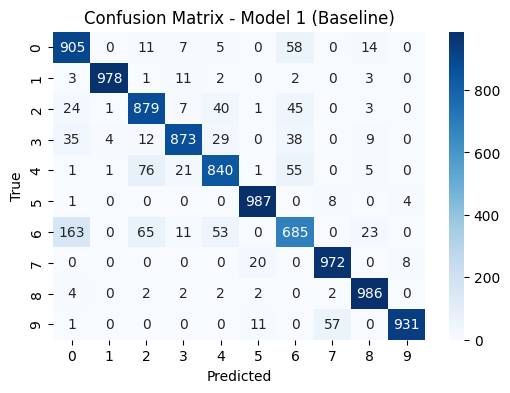

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


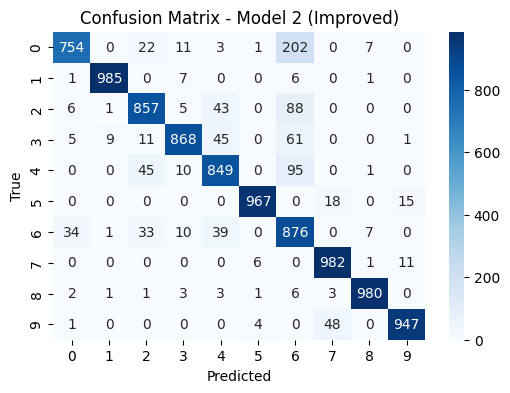

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


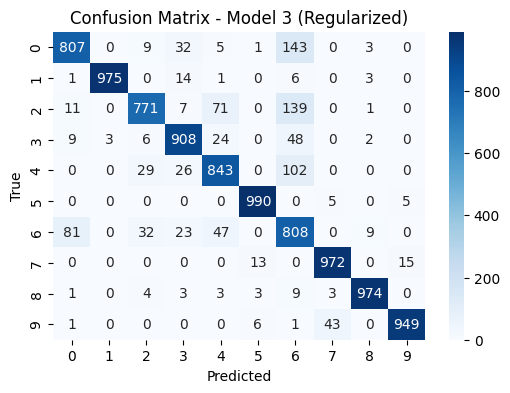

In [9]:
# Evaluate best model (assumed to be model_3)
test_scores = model_3.evaluate(x_test, y_test_cat)
print(f"Test Accuracy (Model 3): {test_scores[1]:.4f}")

# Plot confusion matrices for all three models
models = [model_1, model_2, model_3]
model_names = ["Model 1 (Baseline)", "Model 2 (Improved)", "Model 3 (Regularized)"]

for model, name in zip(models, model_names):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test_cat, axis=1)
    cm = confusion_matrix(y_true, y_pred_classes)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# 10. Summary of Model 

In [10]:
# Summarize performance
print(f"Model 1 Accuracy: {val_scores_1[1]:.4f}")
print(f"Model 2 Accuracy: {val_scores_2[1]:.4f}")
print(f"Model 3 Accuracy: {val_scores_3[1]:.4f}")
# Choose best model based on val/test performance
val_accuracies = [val_scores_1[1], val_scores_2[1], val_scores_3[1]]
best_model_index = np.argmax(val_accuracies)
print(f"\nBest performing model on validation set: Model {best_model_index + 1}")

Model 1 Accuracy: 0.9073
Model 2 Accuracy: 0.9099
Model 3 Accuracy: 0.9087

Best performing model on validation set: Model 2
